**Team Name:** DataNerds

**Student Details:**

--------------------------

Name : Reshma Vijay Jawale

Student Id : A0236581B

--------------------------
Name : Aiden Low Yew Woei

Student Id : A0121969W

--------------------------
Name : Raivat Bhupesh Shah 

Student Id : A0184879A

--------------------------

In [70]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

from IPython.display import display
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt

# Scikit learn
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsClassifier, KNeighborsRegressor
from sklearn import preprocessing
from sklearn.compose import make_column_transformer
from sklearn.compose import make_column_selector
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import RepeatedKFold
from sklearn.experimental import enable_halving_search_cv
from sklearn.model_selection import HalvingGridSearchCV
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import RandomForestRegressor

from scipy.spatial import Voronoi, voronoi_plot_2d
from matplotlib.patches import Rectangle, Circle
from matplotlib.colors import ListedColormap

from sklearn.model_selection import cross_val_score, RepeatedStratifiedKFold
from sklearn.metrics import mean_squared_error
from sklearn.metrics import make_scorer

# For adaboost
from sklearn.ensemble import AdaBoostClassifier


import os
for dirname, _, filenames in os.walk('data'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

data/.DS_Store
data/example-submission.csv
data/test.csv
data/train.csv
data/auxiliary-data/.DS_Store
data/auxiliary-data/auxiliary-data/sg-gov-markets-hawker-centres.csv
data/auxiliary-data/auxiliary-data/sg-commerical-centres.csv
data/auxiliary-data/auxiliary-data/sg-primary-schools.csv
data/auxiliary-data/auxiliary-data/sg-shopping-malls.csv
data/auxiliary-data/auxiliary-data/sg-secondary-schools.csv
data/auxiliary-data/auxiliary-data/sg-train-stations.csv
ERROR! Session/line number was not unique in database. History logging moved to new session 68


In [71]:
df_prices_train = pd.read_csv("data/train.csv")
df_prices_test = pd.read_csv("data/test.csv")
df_commercial_centres = pd.read_csv("data/auxiliary-data/auxiliary-data/sg-commerical-centres.csv")
df_train_stations = pd.read_csv("data/auxiliary-data/auxiliary-data/sg-train-stations.csv")
df_shopping_malls = pd.read_csv("data/auxiliary-data/auxiliary-data/sg-shopping-malls.csv")
df_primary_schools = pd.read_csv("data/auxiliary-data/auxiliary-data/sg-primary-schools.csv")
df_secondary_schools = pd.read_csv("data/auxiliary-data/auxiliary-data/sg-secondary-schools.csv")
print("Property Prices train dataset", df_prices_train.shape)
display(df_prices_train.head())
print("Aux: Commercial Centres", df_commercial_centres.shape)
display(df_commercial_centres.head())
print("Aux: Train Stations", df_train_stations.shape)
display(df_train_stations.head())
print("Aux: Shopping Malls", df_shopping_malls.shape)
display(df_shopping_malls.head())
print("Aux: Primary Schools", df_primary_schools.shape)
display(df_primary_schools.head())
print("Aux: Secondary Schools", df_secondary_schools.shape)
display(df_secondary_schools.head())

Property Prices train dataset (26048, 23)


,listing_id,name,street,type,model,market_segment,type_of_area,bedrooms,bathrooms,district,...,lat,lng,tenure,built_year,no_of_units,area_size,eco_category,accessibility,date_listed,price
0,6998418,seascape,57 cove way,condominium,condominium,ocr,strata,3,4.0,4,...,1.239337,103.837487,leasehold/99 years,2011.0,151.0,2336.0,uncategorized,guarded,2021-05-04,5390000.0
1,2046604,la maison,10 moulmein rise,apartment,apartment,ocr,strata,3,3.0,11,...,1.319533,103.847030,freehold,1999.0,24.0,1259.0,uncategorized,guarded,2021-05-07,2310000.0
2,7563513,viva,2 suffolk walk,condominium,condominium,ocr,strata,4,3.0,11,...,1.315656,103.844445,freehold,2012.0,235.0,1959.0,uncategorized,guarded,2021-06-30,5279500.0
3,3071445,urban treasures,205 jalan eunos,condominium,condominium,ocr,strata,3,2.0,14,...,1.329367,103.905791,freehold,NaN,237.0,883.0,uncategorized,guarded,2022-01-02,1843600.0
4,9667539,infini at east coast,east coast road,apartment,apartment,ocr,strata,3,3.0,15,...,1.309176,103.911352,freehold,NaN,36.0,1066.0,uncategorized,guarded,2021-12-24,2262700.0


Aux: Commercial Centres (38, 4)


,name,type,lat,lng
0,Central Business District,CR,1.286768,103.854529
1,Jurong Lake District,CR,1.334085,103.734513
2,Seletar Regional Centre,CR,1.409435,103.866820
3,Tampines Regional Centre,CR,1.353180,103.945188
4,Woodlands Regional Centre,CR,1.436748,103.786485


Aux: Train Stations (166, 6)


,name,codes,lat,lng,opening_year,type
0,Eunos,EW7,1.319778,103.903252,1989.0,mrt
1,Chinese Garden,EW25,1.342352,103.732596,1988.0,mrt
2,Khatib,NS14,1.417383,103.832980,1988.0,mrt
3,Kranji,NS7,1.425177,103.762165,1996.0,mrt
4,Redhill,EW18,1.289562,103.816816,1988.0,mrt


Aux: Shopping Malls (174, 4)


,name,lat,lng,wikipedia_link
0,100 AM,1.275012,103.841372,NaN
1,313@Somerset,1.301013,103.838540,NaN
2,Aperia,1.309714,103.863837,NaN
3,Balestier Hill Shopping Centre,1.325442,103.842521,NaN
4,Bugis Cube,1.298276,103.855555,NaN


Aux: Primary Schools (191, 3)


,name,lat,lng
0,Admiralty Primary School,1.442941,103.800345
1,Ahmad Ibrahim Primary School,1.433849,103.832710
2,Ai Tong School,1.360713,103.833018
3,Alexandra Primary School,1.291284,103.824066
4,Anchor Green Primary School,1.390380,103.887354


Aux: Secondary Schools (150, 3)


,name,lat,lng
0,Admiralty Secondary School,1.445912,103.802908
1,Ahmad Ibrahim Secondary School,1.436095,103.830055
2,Anderson Secondary School,1.375417,103.851723
3,Anglican High School,1.330218,103.941759
4,Anglo-Chinese School (Barker Road),1.319709,103.835661


# EDA

Key notes:
1. Many rows have missing values in the columns: `built_year` (10043 rows), `model` (1280 rows) (actually how do we handle them in the test dataset?)

In [72]:
categorical_columns = [
    'name',
    'street',
    'type',
    'model',
    'market_segment',
    'type_of_area',
    'tenure',
    'uncategorized',
    'accessibility',
    'date_listed'
]

In [73]:
# Catching null values
print(df_prices_train[df_prices_train.isna().any(axis=1)].shape)
print(df_prices_train[df_prices_train['built_year'].isna()].shape)
print(df_prices_train[df_prices_train['model'].isna()].shape)
print(df_prices_train[df_prices_train['bedrooms'].isna()].shape)
print(df_prices_train[df_prices_train['bathrooms'].isna()].shape)
not_na = df_prices_train[~df_prices_train['built_year'].isna() & ~df_prices_train['model'].isna()]
not_na[not_na.isna().any(axis=1)] # let's drop these?

(11576, 23)
(10043, 23)
(1280, 23)
(404, 23)
(1236, 23)


,listing_id,name,street,type,model,market_segment,type_of_area,bedrooms,bathrooms,district,...,lat,lng,tenure,built_year,no_of_units,area_size,eco_category,accessibility,date_listed,price
15,2882890,the line @ tanjong rhu,6 tanjong rhu road,condominium,condominium,ocr,strata,3,NaN,15,...,1.298437,103.884408,freehold,2016.0,130.0,1216.0,uncategorized,guarded,2021-12-24,2809000.0
59,9357059,suites @ eastcoast,173 upper east coast road,condominium,condominium,ocr,strata,NaN,1.0,15,...,1.314620,103.932237,freehold,2012.0,116.0,409.0,uncategorized,guarded,2021-12-06,715000.0
111,7616417,eden residences capitol,stamford road,apartment,apartment,ocr,strata,NaN,NaN,6,...,1.292988,103.851047,leasehold/99 years,2016.0,39.0,6609.0,uncategorized,guarded,2021-11-07,27423000.0
136,1265096,helios residences,17 cairnhill circle,apartment,apartment,ocr,strata,2+1,NaN,9,...,1.306829,103.838165,freehold,2011.0,140.0,1281.0,uncategorized,guarded,2021-06-28,3608000.0
145,8249118,spottiswoode residences,48 spottiswoode park road,condominium,condominium,ocr,strata,1,NaN,2,...,1.275271,103.836832,freehold,2013.0,351.0,603.0,uncategorized,guarded,2022-01-05,1518000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25866,2625223,the tennery,woodlands road,apartment,apartment,ocr,strata,NaN,2.0,23,...,1.379727,103.760191,leasehold/99 years,2014.0,338.0,624.0,uncategorized,guarded,2021-11-01,825000.0
25884,7034100,v on shenton,shenton way,apartment,apartment,ocr,strata,NaN,1.0,1,...,1.277083,103.849181,leasehold/99 years,2017.0,510.0,441.0,uncategorized,guarded,2021-12-18,1099800.0
26000,8873630,residences @ somme,petain road,apartment,apartment,ocr,strata,NaN,1.0,8,...,1.311510,103.858718,freehold,2008.0,28.0,441.0,uncategorized,guarded,2022-01-04,858000.0
26013,2373007,beauty world centre,upper bukit timah road,apartment,apartment,ocr,strata,3+1,NaN,21,...,1.342413,103.776539,leasehold/99 years,1984.0,80.0,1873.0,uncategorized,guarded,2021-10-12,1980000.0


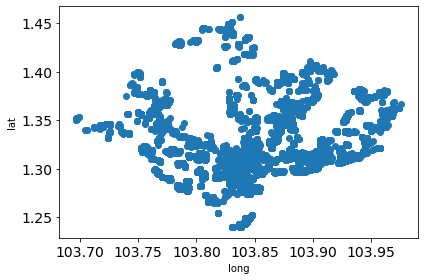

In [74]:
lat = df_prices_train['lat']
long = df_prices_train['lng']

plt.figure()
plt.tick_params(labelsize=14)
plt.scatter(long, lat)
plt.xlabel("long")
plt.ylabel("lat")
plt.tight_layout()
plt.show()

# Baseline adaboost with dropped categorical features

In [75]:
df_prices_train = df_prices_train[~df_prices_train.isna().any(axis=1)]

In [76]:
# Drop columns with null bedrooms or bathrooms
df_prices_train = df_prices_train[df_prices_train['bedrooms'].notna()]
df_prices_train = df_prices_train[df_prices_train['bathrooms'].notna()]
# Convert bedrooms stated as 1+2 into integers by evaluating them.
df_prices_train['bedrooms'] = df_prices_train['bedrooms'].apply(lambda x: eval(str(x)))

In [93]:
X_train = df_prices_train[['bedrooms', 'bathrooms', 'built_year', 'no_of_units', 'area_size', 'lat', 'lng']]
y_train = df_prices_train[['price']].values.ravel()

model = AdaBoostRegressor(base_estimator=DecisionTreeRegressor())
# Use 10-Fold Cross Validation
cv = RepeatedKFold(n_splits=10, n_repeats=1, random_state=1)
# define grid search for hyperparameters
grid = {
    'base_estimator__max_depth': [i for i in range(1, 21, 2)],
    'n_estimators': [25, 50, 100, 150, 250, 500],
    'learning_rate': [0.1, 1.0],
}
mse = make_scorer(mean_squared_error, greater_is_better=False)
grid_search = HalvingGridSearchCV(estimator=model, param_grid=grid, n_jobs=-1, cv=cv, scoring=mse, verbose=10)
# Execute the grid search
grid_results = grid_search.fit(X_train, y_train)

n_iterations: 5
n_required_iterations: 5
n_possible_iterations: 5
min_resources_: 178
max_resources_: 14472
aggressive_elimination: False
factor: 3
----------
iter: 0
n_candidates: 120
n_resources: 178
Fitting 10 folds for each of 120 candidates, totalling 1200 fits
----------
iter: 1
n_candidates: 40
n_resources: 534
Fitting 10 folds for each of 40 candidates, totalling 400 fits
----------
iter: 2
n_candidates: 14
n_resources: 1602
Fitting 10 folds for each of 14 candidates, totalling 140 fits
----------
iter: 3
n_candidates: 5
n_resources: 4806
Fitting 10 folds for each of 5 candidates, totalling 50 fits
----------
iter: 4
n_candidates: 2
n_resources: 14418
Fitting 10 folds for each of 2 candidates, totalling 20 fits


In [94]:
# Get RMSE of grid results best score
best_rmse = (-grid_results.best_score_) ** 0.5
print("Best: %f using %s" % (best_rmse, grid_results.best_params_))
means = grid_results.cv_results_['mean_test_score']
stds = grid_results.cv_results_['std_test_score']
params = grid_results.cv_results_['params']
# for mean, stdev, param in zip(means, stds, params):
#     print("%f (%f) with: %r" % (mean, stdev, param))

Best: 1017551.476721 using {'base_estimator__max_depth': 15, 'learning_rate': 1.0, 'n_estimators': 50}


In [92]:
clf = grid_results
df_prices_test = df_prices_test.fillna(0)
df_prices_test['bedrooms'] = df_prices_test['bedrooms'].apply(lambda x: eval(str(x)) if str(x) != '10+' else 10)
X_test = df_prices_test[['bedrooms', 'bathrooms', 'built_year', 'no_of_units', 'area_size']]
y_pred = clf.predict(X_test)

In [ ]:
result = pd.DataFrame({"Predicted": y_pred})
result.index.name = "Id"
result.to_csv("submission.csv")

# Random Forest

In [95]:
# Get data
X_train = df_prices_train[['bedrooms', 'bathrooms', 'built_year', 'no_of_units', 'area_size', 'lat', 'lng']]
y_train = df_prices_train[['price']].values.ravel()

In [96]:
X_train.shape

(14472, 7)

In [97]:
model = RandomForestRegressor()
# Use 10-Fold Cross Validation
cv = RepeatedKFold(n_splits=10, n_repeats=1, random_state=1)
# define grid search for hyperparameters
num_features = X_train.shape[1]
grid = {
    'max_features': ['auto', 'sqrt'],
    'max_depth': [i for i in range(1, 21, 2)],
    'n_estimators': [25, 50, 100, 150, 250, 500],
}
mse = make_scorer(mean_squared_error, greater_is_better=False)
grid_search = HalvingGridSearchCV(estimator=model, param_grid=grid, n_jobs=-1, cv=cv, scoring=mse, verbose=1)
# Execute the grid search
grid_results = grid_search.fit(X_train, y_train)

n_iterations: 5
n_required_iterations: 5
n_possible_iterations: 5
min_resources_: 178
max_resources_: 14472
aggressive_elimination: False
factor: 3
----------
iter: 0
n_candidates: 120
n_resources: 178
Fitting 10 folds for each of 120 candidates, totalling 1200 fits
----------
iter: 1
n_candidates: 40
n_resources: 534
Fitting 10 folds for each of 40 candidates, totalling 400 fits
----------
iter: 2
n_candidates: 14
n_resources: 1602
Fitting 10 folds for each of 14 candidates, totalling 140 fits
----------
iter: 3
n_candidates: 5
n_resources: 4806
Fitting 10 folds for each of 5 candidates, totalling 50 fits
----------
iter: 4
n_candidates: 2
n_resources: 14418
Fitting 10 folds for each of 2 candidates, totalling 20 fits


In [98]:
# Get RMSE of grid results best score
best_rmse = (-grid_results.best_score_) ** 0.5
print("Best: %f using %s" % (best_rmse, grid_results.best_params_))
means = grid_results.cv_results_['mean_test_score']
stds = grid_results.cv_results_['std_test_score']
params = grid_results.cv_results_['params']
# for mean, stdev, param in zip(means, stds, params):
#     print("%f (%f) with: %r" % (mean, stdev, param))

Best: 920049.762798 using {'max_depth': 19, 'max_features': 'auto', 'n_estimators': 250}


In [100]:
clf = grid_results
df_prices_test = df_prices_test.fillna(0)
df_prices_test['bedrooms'] = df_prices_test['bedrooms'].apply(lambda x: eval(str(x)) if str(x) != '10+' else 10)
X_test = df_prices_test[['bedrooms', 'bathrooms', 'built_year', 'no_of_units', 'area_size', 'lat', 'lng']]
y_pred = clf.predict(X_test)

In [101]:
result = pd.DataFrame({"Predicted": y_pred})
result.index.name = "Id"
result.to_csv("submission.csv")